In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [9]:
import time

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

 # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | diego de almagro
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | onega
Processing Record 13 of Set 1 | naryan-mar
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | solsvik
City not found. Skipping...
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | alghero
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | salalah
Processing Record 22 of Set 1 | illoqqortoormiut
C

Processing Record 38 of Set 4 | leshukonskoye
Processing Record 39 of Set 4 | sungairaya
Processing Record 40 of Set 4 | ahar
Processing Record 41 of Set 4 | acapulco
Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | komsomolskiy
Processing Record 44 of Set 4 | bestobe
Processing Record 45 of Set 4 | samarai
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | otradnoye
Processing Record 48 of Set 4 | rupert
Processing Record 49 of Set 4 | kuching
Processing Record 50 of Set 4 | pisco
Processing Record 1 of Set 5 | careiro da varzea
Processing Record 2 of Set 5 | urumqi
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | te anau
Processing Record 5 of Set 5 | katha
City not found. Skipping...
Processing Record 6 of Set 5 | farafenni
Processing Record 7 of Set 5 | ambon
Processing Record 8 of Set 5 | ruatoria
City not found. Skipping...
Processing Recor

Processing Record 23 of Set 8 | wajir
Processing Record 24 of Set 8 | nichinan
Processing Record 25 of Set 8 | souillac
Processing Record 26 of Set 8 | deer lake
Processing Record 27 of Set 8 | rio grande
Processing Record 28 of Set 8 | andijon
Processing Record 29 of Set 8 | port angeles
Processing Record 30 of Set 8 | kedrovyy
Processing Record 31 of Set 8 | chapais
Processing Record 32 of Set 8 | mansehra
Processing Record 33 of Set 8 | tuatapere
Processing Record 34 of Set 8 | yumen
Processing Record 35 of Set 8 | husavik
Processing Record 36 of Set 8 | ormara
Processing Record 37 of Set 8 | coalinga
Processing Record 38 of Set 8 | nosy varika
Processing Record 39 of Set 8 | skeldon
Processing Record 40 of Set 8 | falealupo
City not found. Skipping...
Processing Record 41 of Set 8 | hervey bay
Processing Record 42 of Set 8 | luwuk
Processing Record 43 of Set 8 | bermejo
Processing Record 44 of Set 8 | kruisfontein
Processing Record 45 of Set 8 | sola
Processing Record 46 of Set 8 |

Processing Record 8 of Set 12 | goderich
Processing Record 9 of Set 12 | vardo
Processing Record 10 of Set 12 | zhigansk
Processing Record 11 of Set 12 | bairiki
Processing Record 12 of Set 12 | blonduos
City not found. Skipping...
Processing Record 13 of Set 12 | bahir dar
Processing Record 14 of Set 12 | aykhal
Processing Record 15 of Set 12 | brigantine
Processing Record 16 of Set 12 | lumeje
Processing Record 17 of Set 12 | praia
Processing Record 18 of Set 12 | moron
Processing Record 19 of Set 12 | wanning
Processing Record 20 of Set 12 | nakonde
Processing Record 21 of Set 12 | kumba
Processing Record 22 of Set 12 | durban
Processing Record 23 of Set 12 | nantucket
Processing Record 24 of Set 12 | kokstad
Processing Record 25 of Set 12 | umm lajj
Processing Record 26 of Set 12 | elko
Processing Record 27 of Set 12 | paragominas
Processing Record 28 of Set 12 | grand-santi
Processing Record 29 of Set 12 | vokhma
Processing Record 30 of Set 12 | kudahuvadhoo
Processing Record 31 o

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Diego De Almagro,-26.3667,-70.0500,82.98,15,0,15.26,CL,2022-02-02 18:52:09
1,Ushuaia,-54.8000,-68.3000,49.62,65,75,29.93,AR,2022-02-02 18:47:46
2,Albany,42.6001,-73.9662,44.73,72,94,3.00,US,2022-02-02 18:48:26
3,Butaritari,3.0707,172.7902,80.91,80,64,16.91,KI,2022-02-02 18:52:10
4,Port Elizabeth,-33.9180,25.5701,74.10,100,75,16.11,ZA,2022-02-02 18:52:10
5,Rikitea,-23.1203,-134.9692,77.54,75,100,7.05,PF,2022-02-02 18:47:37
6,Port Alfred,-33.5906,26.8910,74.77,95,100,16.71,ZA,2022-02-02 18:48:12
7,Avarua,-21.2078,-159.7750,80.65,83,20,14.97,CK,2022-02-02 18:50:46
8,Geraldton,-28.7667,114.6000,88.21,15,0,17.27,AU,2022-02-02 18:52:11
9,Nikolskoye,59.7035,30.7861,22.89,99,98,1.03,RU,2022-02-02 18:52:11


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Diego De Almagro,CL,2022-02-02 18:52:09,-26.3667,-70.0500,82.98,15,0,15.26
1,Ushuaia,AR,2022-02-02 18:47:46,-54.8000,-68.3000,49.62,65,75,29.93
2,Albany,US,2022-02-02 18:48:26,42.6001,-73.9662,44.73,72,94,3.00
3,Butaritari,KI,2022-02-02 18:52:10,3.0707,172.7902,80.91,80,64,16.91
4,Port Elizabeth,ZA,2022-02-02 18:52:10,-33.9180,25.5701,74.10,100,75,16.11
5,Rikitea,PF,2022-02-02 18:47:37,-23.1203,-134.9692,77.54,75,100,7.05
6,Port Alfred,ZA,2022-02-02 18:48:12,-33.5906,26.8910,74.77,95,100,16.71
7,Avarua,CK,2022-02-02 18:50:46,-21.2078,-159.7750,80.65,83,20,14.97
8,Geraldton,AU,2022-02-02 18:52:11,-28.7667,114.6000,88.21,15,0,17.27
9,Nikolskoye,RU,2022-02-02 18:52:11,59.7035,30.7861,22.89,99,98,1.03


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

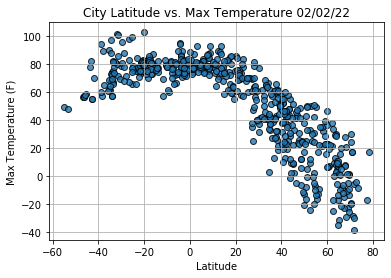

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

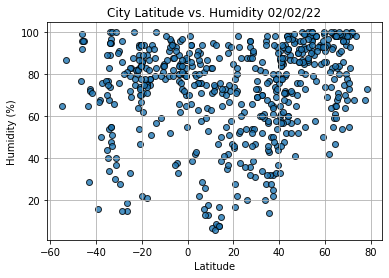

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

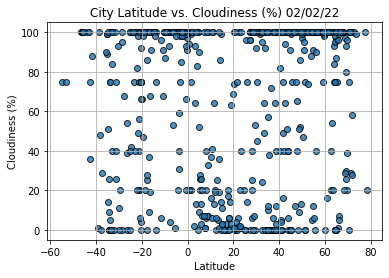

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

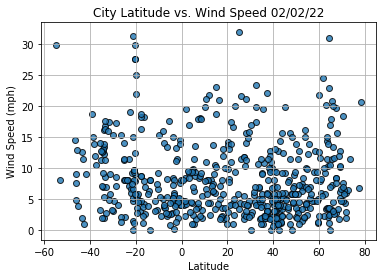

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

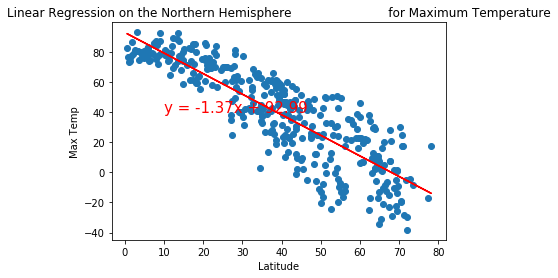

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
    
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
    
    

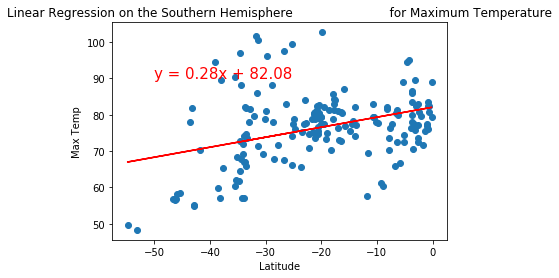

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

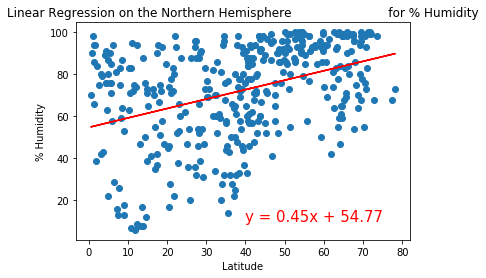

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

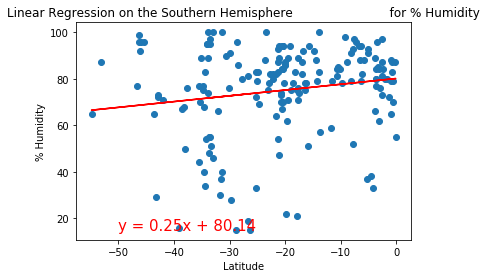

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

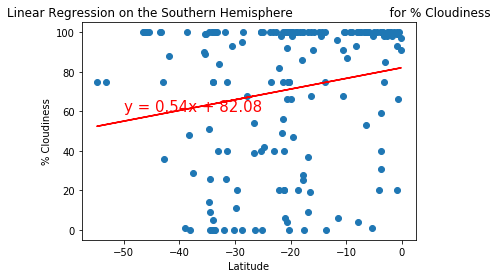

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

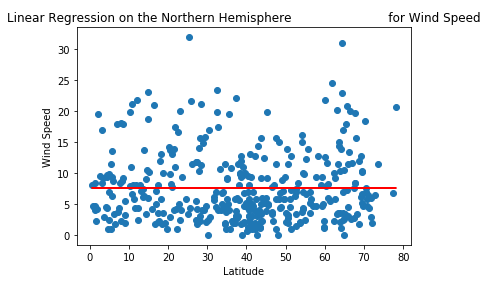

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

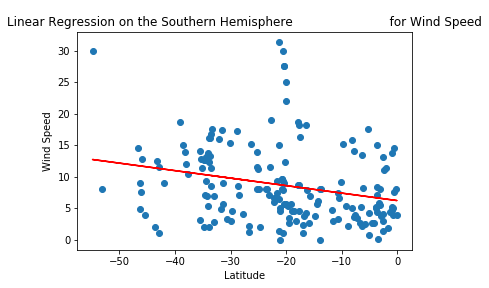

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))